In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import tool
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
from itertools import combinations
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
def findsubsets(S, m):
    return set(combinations(S, m))

def jaccard_index(a,b):
    den=len(a|b)
    if den ==0:
        return 0.0
    else:
        return float(len(a&b) / den)

def siblings(G,a):
    sibs=set()
    for x in G.successors(a):
        for bb in G.predecessors(x):
            if bb !=a:
                sibs.add(bb)
    return sibs

def is_siblings(G,a,b):
    sibs=siblings(G,a)
    if b in sibs:
        return True
    else:
        return False

def min_max_mean_std_hist(data,title,x_describe,y_describe,color_id):
    plt.figure(figsize=(12, 8))
    color = sns.color_palette()
    cnt_srs = pd.Series(data).value_counts()
    min=np.min(np.array(data))
    max=np.max(np.array(data))
    mean=np.mean(np.array(data))
    std=np.std(np.array(data))
    statx ="x: min: %.4f max: %.4f mean: %.4f std: %.4f\n" % (min, max, mean, std)
    min=np.min(np.array(cnt_srs.values))
    max=np.max(np.array(cnt_srs.values))
    mean=np.mean(np.array(cnt_srs.values))
    std=np.std(np.array(cnt_srs.values))
    staty="y: min: %.4f max: %.4f mean: %.4f std: %.4f" %(min,max,mean,std)
    plt.title(title)
    print(statx+staty)
    sns.barplot(cnt_srs.index, cnt_srs.values, color=color[color_id])
    plt.ylabel(y_describe, fontsize=12)
    plt.xlabel(x_describe, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.show()
    
def min_max_mean_std_hist_float(data,title,x_describe,y_describe,bin,color_id):
    plt.figure(figsize=(12, 8))
    counts, bins, patches=plt.hist(data,bins=bin,color=color_id)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    color = sns.color_palette()
    cnt_srs = pd.Series(data).value_counts()
    min=np.min(np.array(data))
    max=np.max(np.array(data))
    mean=np.mean(np.array(data))
    std=np.std(np.array(data))
    statx ='x: min: %.4f max: %.4f mean: %.4f std: %.4f\n' % (min, max, mean, std)
#     min=np.min(np.array(cnt_srs.values))
#     max=np.max(np.array(cnt_srs.values))
#     mean=np.mean(np.array(cnt_srs.values))
#     std=np.std(np.array(cnt_srs.values))
    plt.title(title)
    print(statx)
    plt.ylabel(y_describe, fontsize=12)
    plt.xlabel(x_describe, fontsize=12)
    plt.xticks(rotation='vertical')

    for count, x,b in zip(counts, bin_centers,bins):
        # Label the raw counts
        plt.annotate(str(b), xy=(b, 0), xycoords=('data', 'axes fraction'),
                     xytext=(0, -35), textcoords='offset points', va='top',
                     ha='center')
        plt.annotate(str(count), xy=(b, 0), xycoords=('data', 'axes fraction'),
            xytext=(0, -45), textcoords='offset points', va='top', ha='center')

        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        plt.annotate(percent, xy=(b, 0), xycoords=('data', 'axes fraction'),
            xytext=(0, -55), textcoords='offset points', va='top', ha='center')


    # Give ourselves some more room at the bottom of the plot
    plt.tight_layout(pad=4)

    plt.show()

In [4]:
TG=nx.DiGraph()

edges=tool.load_csv('../summary/uv_graph_no_incest_topological_sorted.csv')
int_edges=[]
for e in edges:
    if e[0]=='root':
        int_edges.append([e[0],int(e[1])])
    else:
        int_edges.append([int(e[0]),int(e[1])])
TG.add_edges_from(int_edges)
TG.remove_node('root')

terminal_vertices=[x for x in TG.nodes_iter() if TG.out_degree(x)==0 and TG.in_degree(x)>0]
source_vertices=[x for x in TG.nodes_iter() if TG.in_degree(x)==0 and TG.out_degree(x)>0]
isolate_vertices=[x for x in TG.nodes_iter() if TG.in_degree(x)==0 and TG.out_degree(x)==0]

print('number of topic vertices:',len(TG))
print('number of terminal vertices:',len(terminal_vertices))
print('number of source vertices:',len(source_vertices))
print('number of isolate vertices:',len(isolate_vertices))

number of topic vertices: 1999
number of terminal vertices: 1117
number of source vertices: 64
number of isolate vertices: 51


In [5]:
par_chd=[(TG.in_degree(x),TG.out_degree(x),len(siblings(TG,x))) for x in TG.nodes_iter()]

x: min: 0.0000 max: 5.0000 mean: 1.2186 std: 0.5966
y: min: 1.0000 max: 1392.0000 mean: 333.1667 std: 496.8683


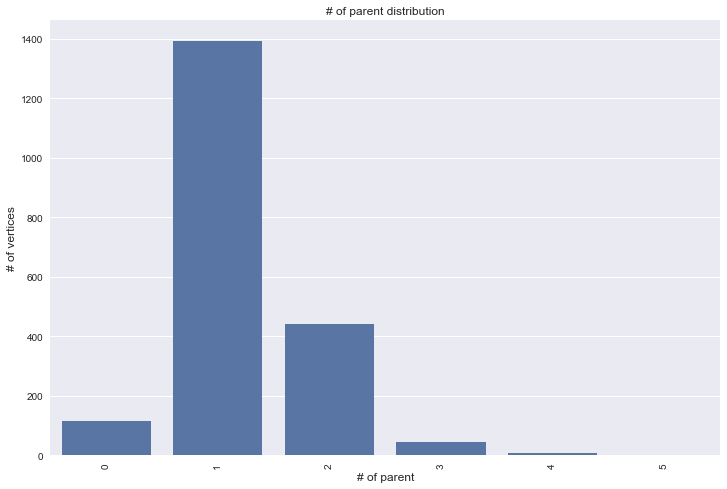

In [6]:
min_max_mean_std_hist([par[0] for par in par_chd],'# of parent distribution','# of parent','# of vertices',0)